In [1]:
from pkg_req import *
from construction import *
from solver import *
from backend import *
from pulses import *
from fidelity import *
from initialization import *
from qiskit.visualization import plot_histogram

# Here we are looking at cross-resonance pulses

https://iopscience.iop.org/article/10.1088/2058-9565/aba404/pdf

-  CR pulses are physically realized by driving the control qubit with microwave pulses at the frequency of the
 target qubit to stimulate the evolution of an effective ZX interaction Hamiltonian, where Z and X are the
 Pauli-Z and X operators of the driven control qubit and the target qubit, respectively

- Below defines an arbitrary CR pulse from the above paper (with arb params):

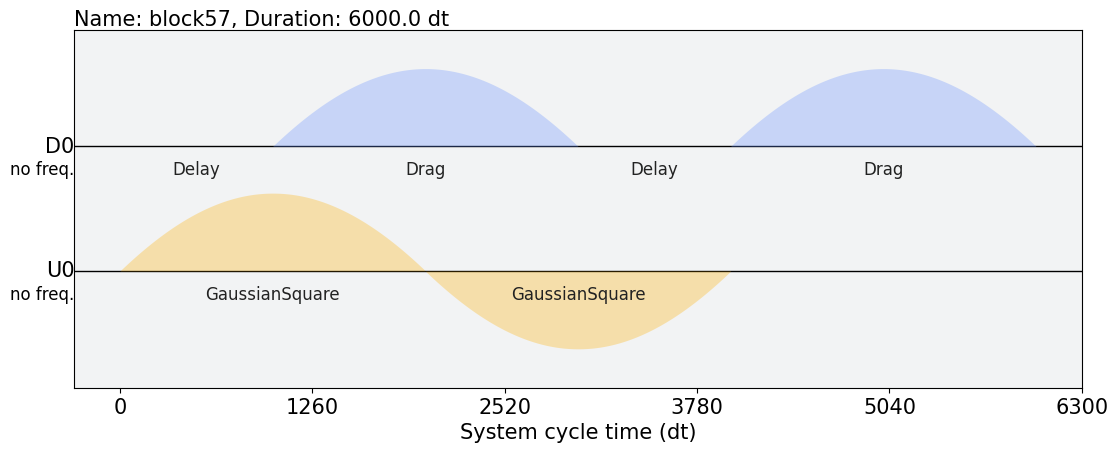

In [69]:
schedules = []
g_sq = qiskit.pulse.library.GaussianSquare(duration=2000, amp=1, sigma=2000, angle=0, width=5, limit_amplitude=None)
g_sq_neg = qiskit.pulse.library.GaussianSquare(duration=2000, amp=-1, sigma=2000, angle=0, width=5, limit_amplitude=None)

drag=pulse.library.Drag(duration=2000, amp=1, sigma=2000, angle=0,beta=0.9,limit_amplitude=False)
with pulse.build(backend=backend) as schedule:
    #with pulse.align_sequential():
    pulse.play(g_sq, pulse.ControlChannel(0))
    pulse.delay(1000, pulse.DriveChannel(0))
    pulse.play(drag, pulse.DriveChannel(0))
    pulse.play(g_sq_neg, pulse.ControlChannel(0))
    pulse.delay(1000, pulse.DriveChannel(0))
    pulse.play(drag, pulse.DriveChannel(0))
    #pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
    pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

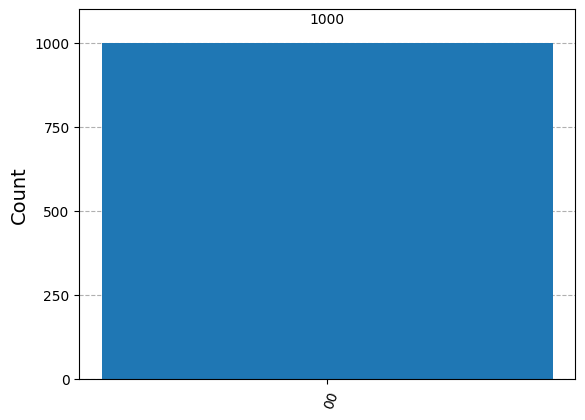

In [70]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
counts
plot_histogram(counts,title="")

- Nothing happens, need to sequentially align:

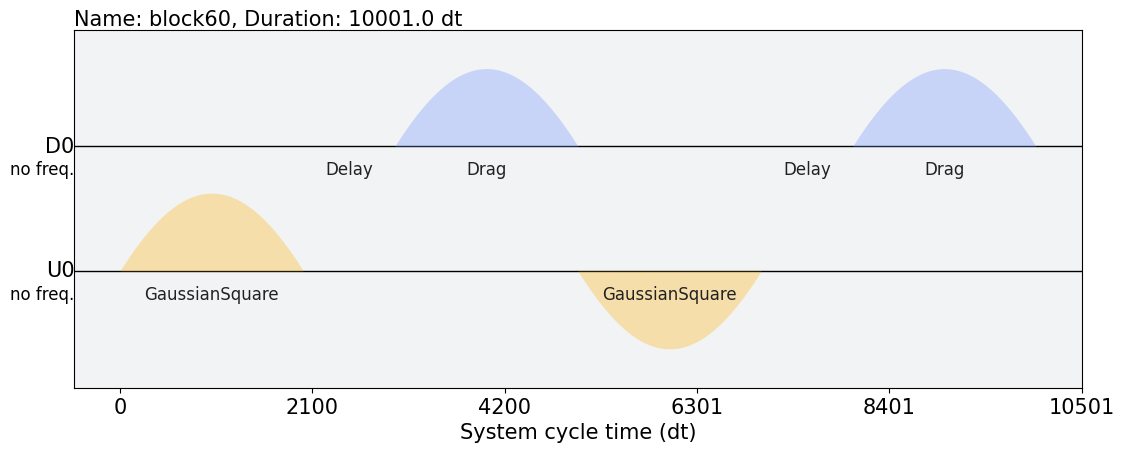

In [73]:
schedules = []
g_sq = qiskit.pulse.library.GaussianSquare(duration=2000, amp=1, sigma=2000, angle=0, width=5, limit_amplitude=None)
g_sq_neg = qiskit.pulse.library.GaussianSquare(duration=2000, amp=-1, sigma=2000, angle=0, width=5, limit_amplitude=None)

drag=pulse.library.Drag(duration=2000, amp=1, sigma=2000, angle=0,beta=0.9,limit_amplitude=False)
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        pulse.play(g_sq, pulse.ControlChannel(0))
        pulse.delay(1000, pulse.DriveChannel(0))
        pulse.play(drag, pulse.DriveChannel(0))
        pulse.play(g_sq_neg, pulse.ControlChannel(0))
        pulse.delay(1000, pulse.DriveChannel(0))
        pulse.play(drag, pulse.DriveChannel(0))
        #pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

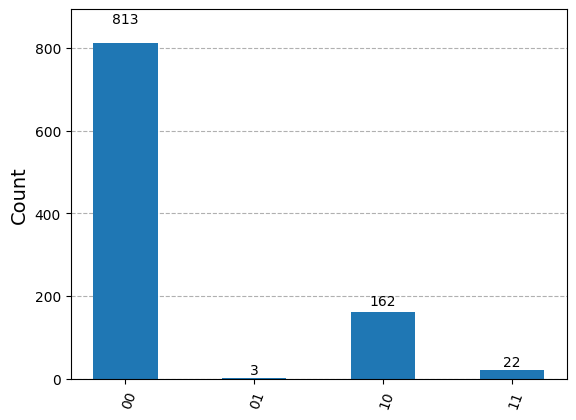

In [74]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
counts
plot_histogram(counts,title="")

- Let's try using square echo pulses for the control channel:

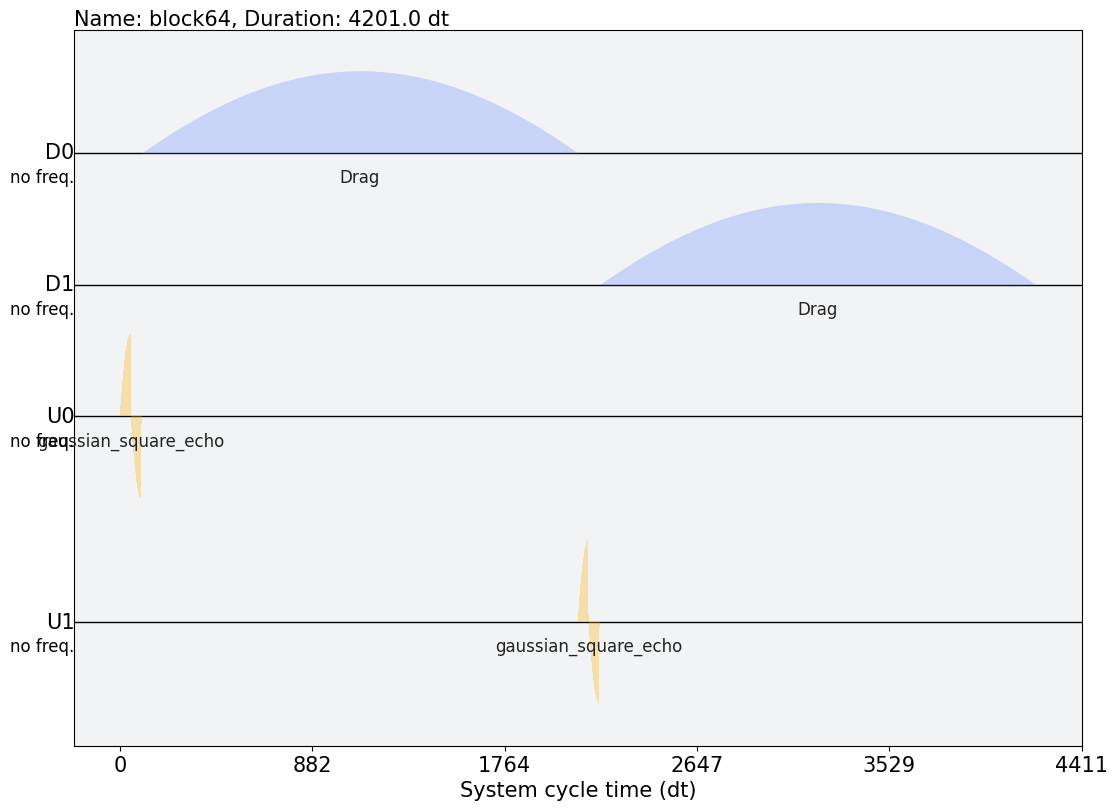

In [76]:
num_samples_sq1=3000
amp_sq1=1
sigma_sq1=4000
angle_sq1=0#np.pi/5
width_sq1=50
g1=gauss_sq(num_samples_sq1, amp_sq1, sigma_sq1, angle_sq1, width_sq1)
g2=gauss_sq(num_samples_sq1, -amp_sq1, sigma_sq1, angle_sq1, width_sq1)

dur_CR=100
amp_CR=0.6
sigma_CR=256
angle_CR=0
width_CR=5
g_er=gauss_CR(dur_CR, amp_CR, sigma_CR, angle_CR, width_CR)
schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        #pulse.play(pulse.Drag(duration=100,amp=1,sigma=sigma_sq1,beta=0), pulse.DriveChannel(0))
        #pulse.play(g1, pulse.DriveChannel(0))
        pulse.play(g_er, pulse.ControlChannel(0))
        #pulse.play(pulse.Drag(duration=100,amp=1,sigma=sigma_sq1,beta=0), pulse.DriveChannel(1))
        pulse.play(drag, pulse.DriveChannel(0))
        pulse.play(g_er, pulse.ControlChannel(1))
        pulse.play(drag, pulse.DriveChannel(1))
        #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0))
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

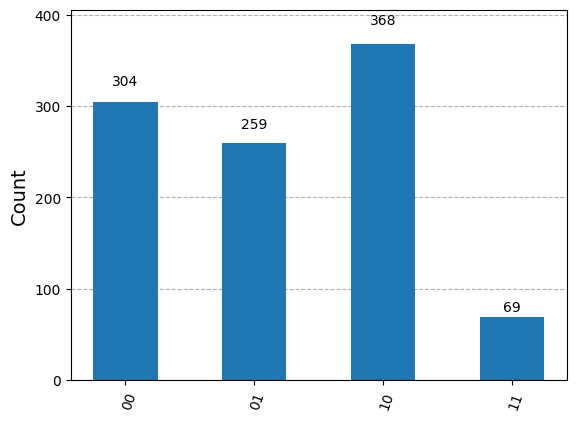

In [77]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
counts
plot_histogram(counts,title="")

Non-zero probability of getting any of the four possible states. Clearly the echo pulses are a better use.

What if we use a Gaussian pulse instead of a DRAG on the Drive Channel?

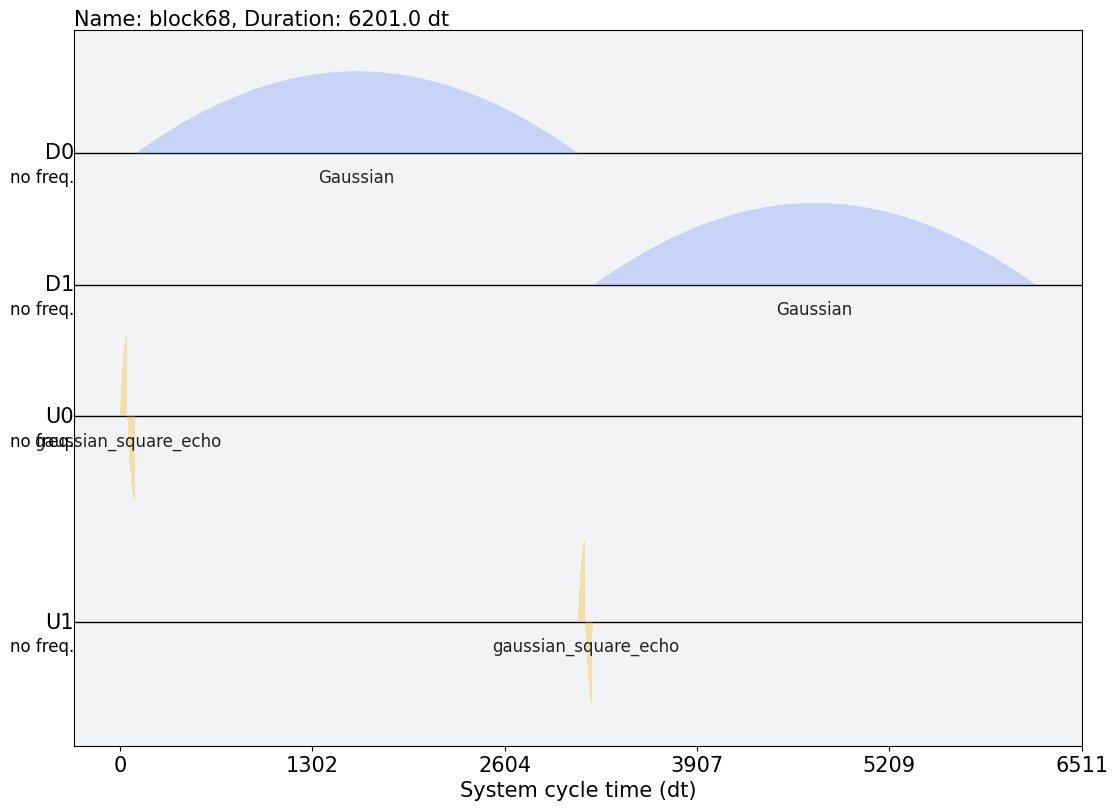

In [81]:
num_samples_sq1=3000
amp_sq1=1
sigma_sq1=4000
angle_sq1=0#np.pi/5
width_sq1=50
g1=gauss(num_samples_sq1, amp_sq1, sigma_sq1, angle_sq1)
g2=gauss(num_samples_sq1, -amp_sq1, sigma_sq1, angle_sq1)

dur_CR=100
amp_CR=0.6
sigma_CR=256
angle_CR=0
width_CR=5
g_er=gauss_CR(dur_CR, amp_CR, sigma_CR, angle_CR, width_CR)
schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        #pulse.play(pulse.Drag(duration=100,amp=1,sigma=sigma_sq1,beta=0), pulse.DriveChannel(0))
        #pulse.play(g1, pulse.DriveChannel(0))
        pulse.play(g_er, pulse.ControlChannel(0))
        #pulse.play(pulse.Drag(duration=100,amp=1,sigma=sigma_sq1,beta=0), pulse.DriveChannel(1))
        pulse.play(g1, pulse.DriveChannel(0))
        pulse.play(g_er, pulse.ControlChannel(1))
        pulse.play(g1, pulse.DriveChannel(1))
        #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0))
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

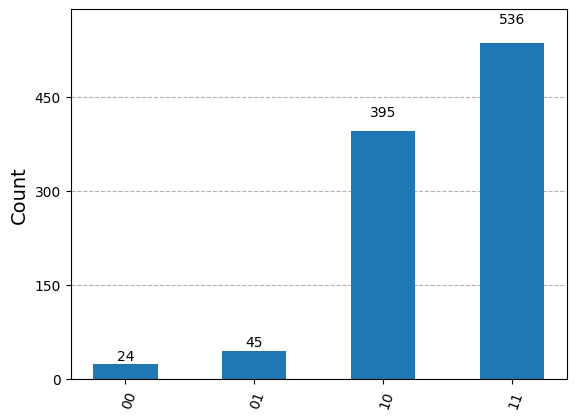

In [82]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
plot_histogram(counts,title="")

How about Gaussian square on the Drive Channel?

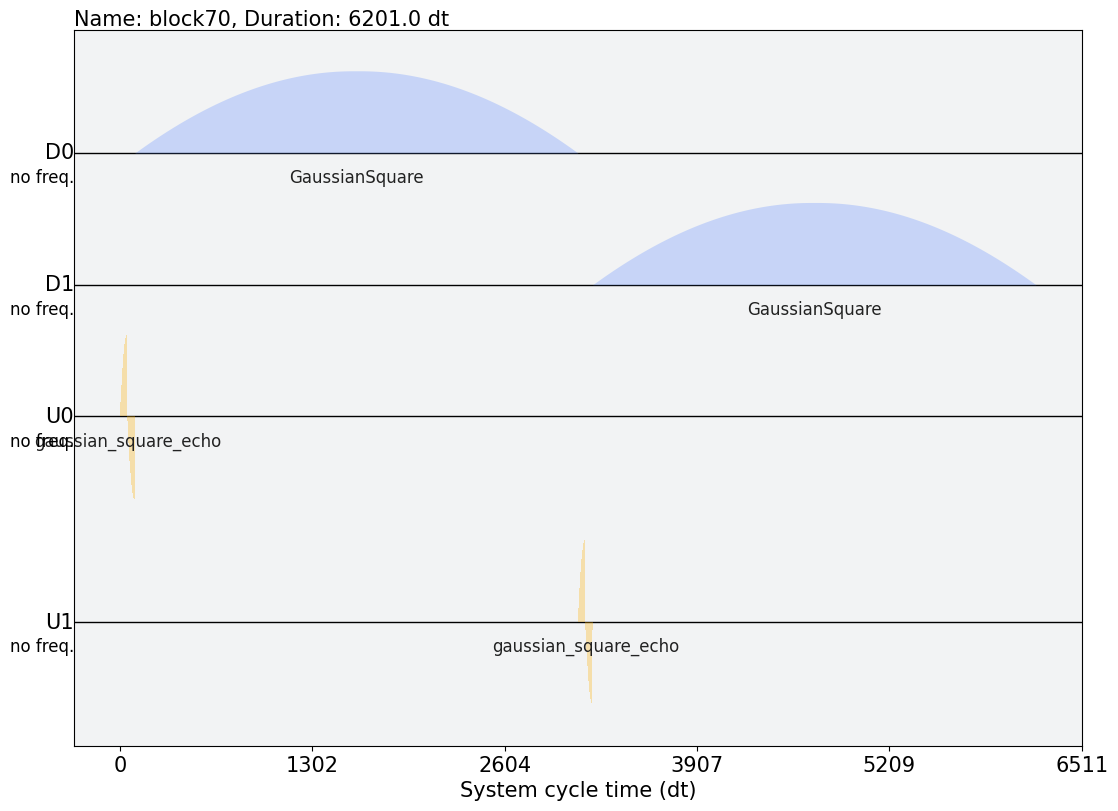

In [83]:
num_samples_sq1=3000
amp_sq1=1
sigma_sq1=4000
angle_sq1=0#np.pi/5
width_sq1=50
g1=gauss_sq(num_samples_sq1, amp_sq1, sigma_sq1, angle_sq1, width_sq1)
g2=gauss_sq(num_samples_sq1, -amp_sq1, sigma_sq1, angle_sq1, width_sq1)

dur_CR=100
amp_CR=0.6
sigma_CR=256
angle_CR=0
width_CR=5
g_er=gauss_CR(dur_CR, amp_CR, sigma_CR, angle_CR, width_CR)
schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        #pulse.play(pulse.Drag(duration=100,amp=1,sigma=sigma_sq1,beta=0), pulse.DriveChannel(0))
        #pulse.play(g1, pulse.DriveChannel(0))
        pulse.play(g_er, pulse.ControlChannel(0))
        #pulse.play(pulse.Drag(duration=100,amp=1,sigma=sigma_sq1,beta=0), pulse.DriveChannel(1))
        pulse.play(g1, pulse.DriveChannel(0))
        pulse.play(g_er, pulse.ControlChannel(1))
        pulse.play(g1, pulse.DriveChannel(1))
        #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0))
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

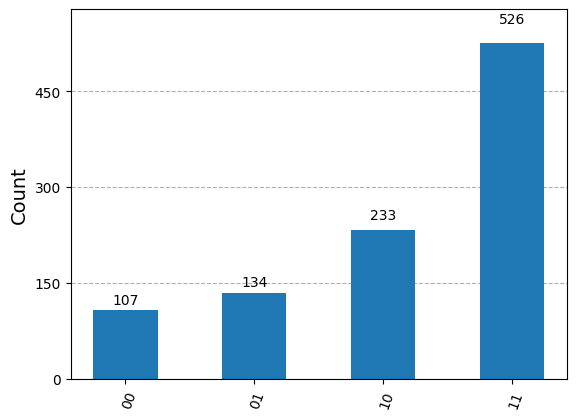

In [84]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
plot_histogram(counts,title="")

# Let's take a look at what is happening from each operations implementation.

1) Just the echo resonance pulse but iterating through amplitude. Here we see counts in all four states so there must be some kind of entanglement?

In [108]:

dur_CR=4000
amp_CR=1
sigma_CR=2000
angle_CR=0
width_CR=5

dat=[]
for amp in np.arange(0.1,1.001,0.1):
    g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
    schedules = []
    
    with pulse.build(backend=backend) as schedule:
        with pulse.align_sequential():
            pulse.play(g, pulse.ControlChannel(0))
           # pulse.play(g1, pulse.DriveChannel(0))
            #pulse.play(g_er, pulse.ControlChannel(1))
            #pulse.play(g1, pulse.DriveChannel(1))
            pulse.measure_all()
    schedules.append(schedule)
    job = backend.run(schedules, shots=1000)
    result = job.result()
    counts=result.get_counts()
    dat.append(counts)
    #print(counts)
    #schedules[0].draw()

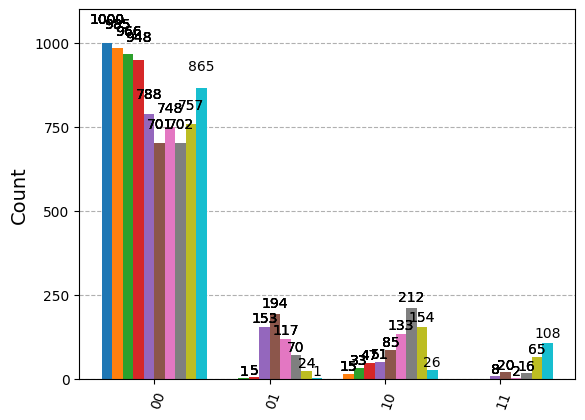

In [109]:
#job = backend.run(schedules, shots=1000)
#result = job.result()
#counts=result.get_counts()
plot_histogram(dat,title="")

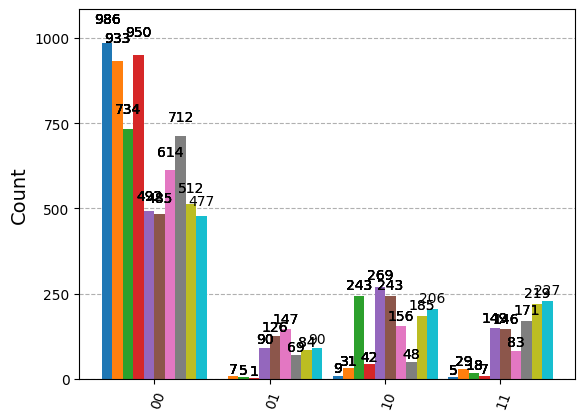

In [112]:
dat=[]
for amp in np.arange(0.1,1.001,0.1):
    g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
    schedules = []
    
    with pulse.build(backend=backend) as schedule:
        with pulse.align_sequential():
            pulse.play(g, pulse.ControlChannel(0))
            pulse.play(g, pulse.DriveChannel(0))
            #pulse.play(g_er, pulse.ControlChannel(1))
            #pulse.play(g1, pulse.DriveChannel(1))
            pulse.measure_all()
    schedules.append(schedule)
    job = backend.run(schedules, shots=1000)
    result = job.result()
    counts=result.get_counts()
    dat.append(counts)
    #print(counts)
    #schedules[0].draw()
#job = backend.run(schedules, shots=1000)
#result = job.result()
#counts=result.get_counts()
plot_histogram(dat,title="")